# Descrição do projeto

A operadora de celular Megaline está insatisfeita com o fato de muitos de seus clientes estarem usando planos antigos. Ela quer desenvolver um modelo que possa analisar o comportamento do cliente e recomendar um dos planos mais recentes da Megaline: Smart ou Ultra.

Você tem acesso a dados de comportamento dos clientes que já mudaram para os novos planos (do projeto do curso de Análise de dados estatísticos). Para essa tarefa de classificação, você precisa desenvolver um modelo que escolhe o plano certo. Como você já executou a etapa de pré-processamento de dados, pode ir direto para a criação do modelo.

Desenvolva um modelo com a maior acurácia possível. Neste projeto, o limite para acurácia é 0,75. Verifique a acurácia usando o conjunto de dados de teste.

# Dicionario dos dados

сalls — número de chamadas

minutes — duração total da chamada em minutos

messages — número de mensagens de texto

mb_used — Tráfego de internet usado em MB

is_ultra — plano para o mês atual (Ultra - 1, Smart - 0)

## Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


## importando os dados

In [2]:

df = pd.read_csv("users_behavior.csv")
df.head()


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## verificando se ha  dados nulos

In [3]:
df[['calls', 'minutes', 'messages', 'mb_used', 'is_ultra']].isna().sum()


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Não foi observado dados nulos

## Divisão dos dados em treino e validação

In [4]:
df_train, df_validacao = train_test_split(df, stratify=df['is_ultra'],test_size=0.2, random_state=42) 
df_validacao, df_test = train_test_split(df_validacao, stratify=df_validacao['is_ultra'],test_size=0.2, random_state=42) 

In [5]:
df_train.shape, df_validacao.shape, df_test.shape

((2571, 5), (514, 5), (129, 5))

In [6]:
df_train['is_ultra'].value_counts(normalize=True)

is_ultra
0    0.693504
1    0.306496
Name: proportion, dtype: float64

## Descrição dos dados

### Informações gerais dos dados

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2571 entries, 576 to 500
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2571 non-null   float64
 1   minutes   2571 non-null   float64
 2   messages  2571 non-null   float64
 3   mb_used   2571 non-null   float64
 4   is_ultra  2571 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 120.5 KB


### verificando linhas duplicadas

In [8]:
df_train.duplicated().sum()

np.int64(0)

não existe duplicados

### verificando distribuição de classe

In [9]:
df_train['is_ultra'].value_counts(normalize=True).round(4)*100

is_ultra
0    69.35
1    30.65
Name: proportion, dtype: float64

69.35% da base de dados e do palno surf

### Analise descritiva

In [10]:
#utilização dos dados de treino ('df_train')
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
calls,2571.0,63.432517,33.049586,0.0,40.00,63.00,82.000,203.00
minutes,2571.0,441.398884,233.839668,0.0,278.38,433.63,576.035,1566.45
messages,2571.0,37.998055,35.636290,0.0,10.00,30.00,56.000,224.00
mb_used,2571.0,17218.920416,7645.248770,0.0,12408.51,17001.87,21467.060,49745.73
is_ultra,2571.0,0.306496,0.461128,0.0,0.00,0.00,1.000,1.00


não foi observado outlier

### Analise de correlação dos dados

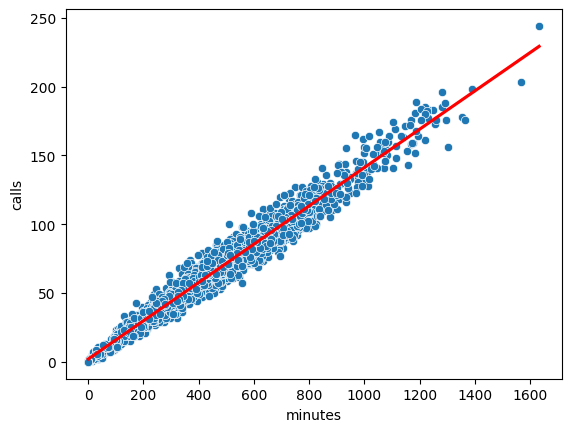

In [11]:

sns.scatterplot(data=df, x='minutes', y='calls')
sns.regplot(data=df, x='minutes', y='calls', scatter=False, color='red')
plt.show()

Existe uma boa correlação entre calls e minutes

## analise exploratoria de dados

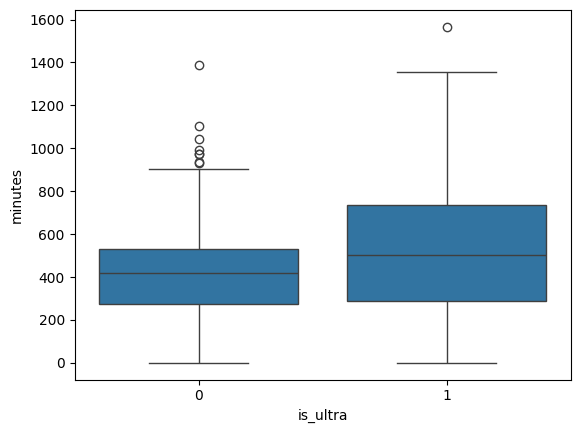

In [12]:
sns.boxplot(data=df_train, x='is_ultra', y='minutes');

Quando o valor de ‘is_ultra’ é zero, os clientes tendem a usar menos minutos em comparação com quando ‘ultra’ é igual a um. observado que existe uma diferença na mediana acima de 400 possivel de ser plano ultra, menor de 400 plano smart


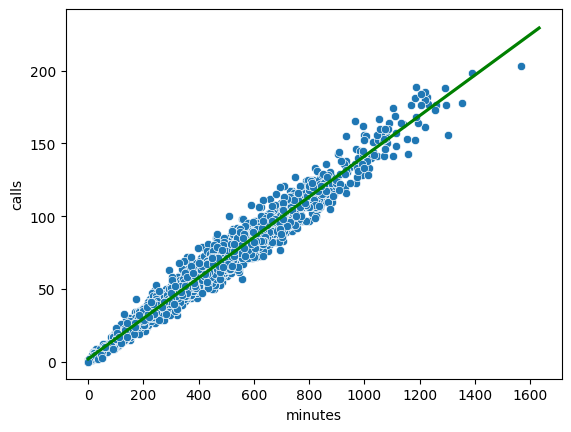

In [13]:
sns.scatterplot(data=df_train, x='minutes', y='calls');
sns.regplot(data=df, x='minutes', y='calls', scatter=False, color='Green')
plt.show()

A pessoa que gasta mais minutos com certeza realizou mais ligações

## Preparação dos dados para treinamento

### dados para treinamento 

In [14]:
x_train = df_train.drop(columns=['is_ultra'], axis=1)
y_train = df_train['is_ultra']

### dados para teste

In [15]:
x_test = df_test.drop(columns=['is_ultra'])
y_test = df_test['is_ultra']

### dados para Validação

In [16]:
x_validacao = df_validacao.drop(columns=['is_ultra'])
y_validacao = df_validacao['is_ultra']

## Modelagem

###  Árvore de Decisão


In [17]:

# Alterando o hiperparâmetro max_depth 
for depth in range(1, 10):
    clf = DecisionTreeClassifier(random_state=123456789, max_depth=depth)
    clf.fit(x_train, y_train)
    predictions_valid = clf.predict(x_validacao)
    predictions_test = clf.predict(x_test)
    print(f'max_depth = {depth}: Validação: {accuracy_score(y_validacao, predictions_valid)*100:.2f}','%'  
          f'   Teste: {accuracy_score(y_test, predictions_test)*100:.2f}', '%')



max_depth = 1: Validação: 74.71 %   Teste: 79.84 %
max_depth = 2: Validação: 77.63 %   Teste: 84.50 %
max_depth = 3: Validação: 78.02 %   Teste: 86.82 %
max_depth = 4: Validação: 78.02 %   Teste: 86.05 %
max_depth = 5: Validação: 76.26 %   Teste: 80.62 %
max_depth = 6: Validação: 79.18 %   Teste: 84.50 %
max_depth = 7: Validação: 77.82 %   Teste: 83.72 %
max_depth = 8: Validação: 77.63 %   Teste: 85.27 %
max_depth = 9: Validação: 78.02 %   Teste: 82.17 %




Aumentei gradualmente o hiperparâmetro **max_depth** até 40 para encontrar a melhor acurácia possível. Descobri que a profundidade ideal era 2, então redefini o código para 10, o que o deixou mais limpo.

Além disso, testei vários valores para o hiperparâmetro **random_state**, e o melhor resultado foi o que utilizei no código final.


### Floresta Aleatória


In [18]:

# Alterando o hiperparâmetro n_estimators 
best_score = 0
best_est = 0
for i in range(1, 20):
    clf = RandomForestClassifier(random_state=1234567, n_estimators=i)
    clf.fit(x_train, y_train)
    score = clf.score(x_validacao, y_validacao)
    if score > best_score:
        best_score = score
        best_est = i

print("A acurácia do melhor desempenho do modelo no conjunto de validação (n_estimators = {}): {:.2f}"
      .format(best_est, best_score*100),'%')


A acurácia do melhor desempenho do modelo no conjunto de validação (n_estimators = 11): 80.35 %


In [19]:

clf = RandomForestClassifier(random_state=1234567, n_estimators=11)
clf.fit(x_train, y_train)

y_predicao = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_predicao)

print("A acurácia do melhor desempenho do modelo no conjunto de teste (n_estimators = {}): {:.2f}".format(11, accuracy*100),'%')


A acurácia do melhor desempenho do modelo no conjunto de teste (n_estimators = 11): 84.50 %


### Regressão Logística


In [20]:

clf = LogisticRegression(random_state=1234567, solver='liblinear')
clf.fit(x_train, y_train)

clf_train = clf.score(x_train, y_train)
clf_valid = clf.score(x_validacao, y_validacao)
clf_test = clf.score(x_test, y_test)

print("A acurácia do melhor desempenho do modelo no conjunto de treinamento: {:.2f}".format(clf_train*100),'%')
print("A acurácia do melhor desempenho do modelo no conjunto de validação:   {:.2f}".format(clf_valid*100),'%')
print("A acurácia do melhor desempenho do modelo no conjunto de teste:       {:.2f}".format(clf_test*100),'%')


A acurácia do melhor desempenho do modelo no conjunto de treinamento: 69.93 %
A acurácia do melhor desempenho do modelo no conjunto de validação:   69.84 %
A acurácia do melhor desempenho do modelo no conjunto de teste:       70.54 %


# Conclusão

O sklearn oferece uma ampla gama de algoritmos de aprendizado de máquina, desde regressão linear até redes neurais, permitindo a aplicação em diversos problemas. Com uma interface simples e consistente, o sklearn facilita a implementação e experimentação de modelos de aprendizado de máquina. Conforme observamos na análise de planos de telefonia, o modelo **RandomForestClassifier** destacou-se em relação aos outros, demosntrando uma **accuracya de 84,5%.**